## HCP Behavial Data 

In this XP I'll will explore HCP data from different domaine  :
- Demographic
- Cognitive
- Emotional/Social
- Motor
- Sensory


In [55]:
import os
import numpy as np
from scipy import stats, integrate
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.io as sio

In [56]:
%matplotlib inline
sns.set(color_codes=True)

In [57]:
# Load pheno file
path_root = '/media/yassinebha/database29/Drive/HCP/'
data = pd.read_csv(os.path.join(path_root,'subtypes_scores/26-10-2016/pheno/hcp_all_pheno.csv'))
data.head()

,Subject,Age_in_Yrs,Twin_Stat,Zygosity,Mother_ID,Father_ID,Race,Ethnicity,Handedness,SSAGA_Employ,...,NEORAW_60,Noise_Comp,Odor_Unadj,Odor_AgeAdj,PainInterf_Tscore,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final
0,100004,24,NotTwin,NotTwin,52259,82122.0,White,Not Hispanic/Latino,95,2.0,...,A,5.2,101.12,86.45,45.9,107.17,105.31,1.80,0.0,1.80
1,100206,27,NotTwin,NotTwin,56037,85858.0,White,Not Hispanic/Latino,65,2.0,...,N,NaN,108.79,97.19,49.7,72.63,72.03,1.84,0.0,1.84
2,100307,27,Twin,NotMZ,51488,81352.0,White,Not Hispanic/Latino,95,2.0,...,A,3.6,101.12,86.45,38.6,71.69,71.76,1.76,0.0,1.76
3,100408,33,Twin,MZ,51730,81594.0,White,Not Hispanic/Latino,55,2.0,...,A,2.0,108.79,98.04,52.6,114.01,113.59,1.76,2.0,1.68
4,100610,27,Twin,NotMZ,52813,82634.0,White,Not Hispanic/Latino,85,2.0,...,A,2.0,122.25,110.45,38.6,84.84,85.31,1.92,1.0,1.88


# Demographic Domain

In [73]:
behav_demog = ["Age_in_Yrs","Gender","Handedness","Zygosity","Race","Ethnicity","SSAGA_Income","SSAGA_Educ"]
data_demog = data.get(behav_demog)
data_demog.head()

,Age_in_Yrs,Gender,Handedness,Zygosity,Race,Ethnicity,SSAGA_Income,SSAGA_Educ
0,24,M,95,NotTwin,White,Not Hispanic/Latino,4.0,14.0
1,27,M,65,NotTwin,White,Not Hispanic/Latino,4.0,16.0
2,27,F,95,NotMZ,White,Not Hispanic/Latino,7.0,16.0
3,33,M,55,MZ,White,Not Hispanic/Latino,7.0,16.0
4,27,M,85,NotMZ,White,Not Hispanic/Latino,6.0,16.0


In [74]:
data_demog.Zygosity.value_counts()

NotTwin    494
NotMZ      250
MZ         225
Name: Zygosity, dtype: int64

In [75]:
data_demog.Ethnicity.value_counts()

Not Hispanic/Latino        884
Hispanic/Latino             78
Unknown or Not Reported      8
Name: Ethnicity, dtype: int64

In [76]:
data_demog.Race.value_counts()

White                                   702
Black or African Am.                    178
Asian/Nat. Hawaiian/Othr Pacific Is.     48
More than one                            22
Unknown or Not Reported                  18
Am. Indian/Alaskan Nat.                   2
Name: Race, dtype: int64

In [77]:
# Replace cathegorical variable with numeric value
# Gender -->'M':1,'F':2
# Zygosity --> 'NotTwin':0, 'NotMZ':1, 'MZ':2
# Ethnicity --> 'Not Hispanic/Latino':0, 'Hispanic/Latino':1, 'Unknown or Not Reported':2
# Race --> 'White':0, 'Black or African Am.':1, 'Asian/Nat. Hawaiian/Othr Pacific Is.':2, 
#          'More than one':3, 'Unknown or Not Reported':4, 'Am. Indian/Alaskan Nat.':5 
data_demog.Gender.replace({'M':1,'F':2}, inplace=True)
data_demog.Zygosity.replace({'NotTwin':0, 'NotMZ':1, 'MZ':2}, inplace=True)
data_demog.Ethnicity.replace({'Not Hispanic/Latino':0, 'Hispanic/Latino':1, 'Unknown or Not Reported':2}, inplace=True)
data_demog.Race.replace({'White':0 ,'Black or African Am.':1, 'Asian/Nat. Hawaiian/Othr Pacific Is.':2,'More than one':3, 'Unknown or Not Reported':4, 'Am. Indian/Alaskan Nat.':5 }, inplace=True)

/usr/local/lib/python3.4/dist-packages/pandas/core/generic.py:3554: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


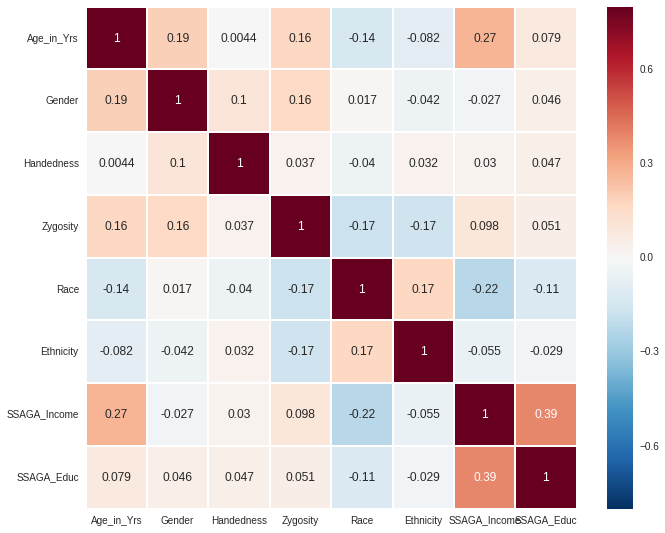

In [78]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(data_demog.corr(),linewidths=.5,annot=True,ax=ax,vmax=.8)

### The most correlated Demog data

- #### Income and Years of Education

/usr/local/lib/python3.4/dist-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j
/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


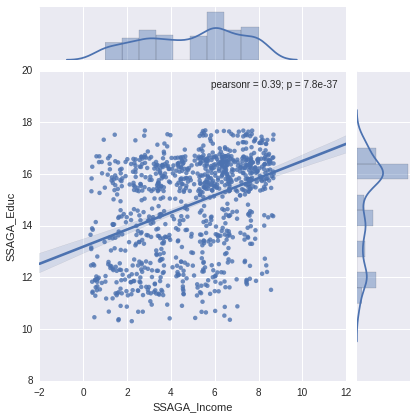

In [87]:
sns.set(color_codes=True)
sns.jointplot(x="SSAGA_Income", y="SSAGA_Educ", x_jitter=.7,y_jitter=.7,data=data_demog,kind="reg");

- ####  Income and Age

/usr/local/lib/python3.4/dist-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j
/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


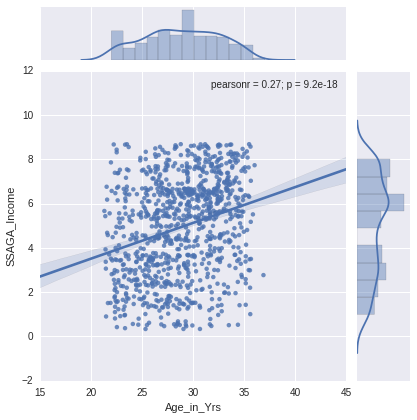

In [86]:
sns.set(color_codes=True)
sns.jointplot(x="Age_in_Yrs", y="SSAGA_Income", data=data_demog, x_jitter=.7,y_jitter=.7,kind='reg');

#### Gender differences 
- **Incomes**

Total household income: 
- <$10,000 = 1
- 10K-19,999 = 2
- 20K-29,999 = 3
- 30K-39,999 = 4
- 40K-49,999 = 5
- 50K-74,999 = 6
- 75K-99,999 = 7
- 100,000 and more = 8

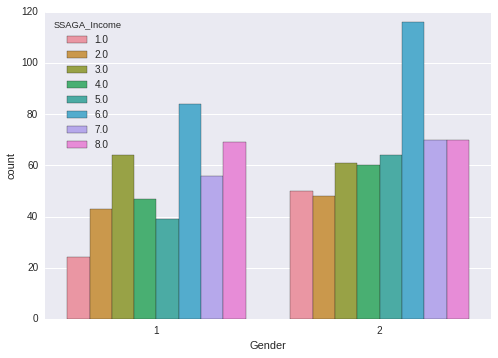

In [90]:
#'Male':1,'Female':2
sns.countplot(x='Gender',hue='SSAGA_Income',data=data_demog)

- **Education**

Years of education completed: <11 = 11; 12; 13; 14; 15; 16; 17+ = 17

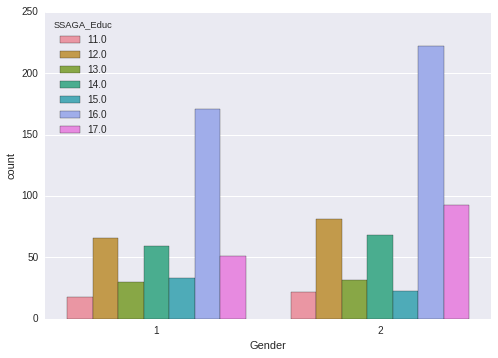

In [91]:
# Gender diference - Education

sns.countplot(x='Gender',hue='SSAGA_Educ',data=data_demog)